In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

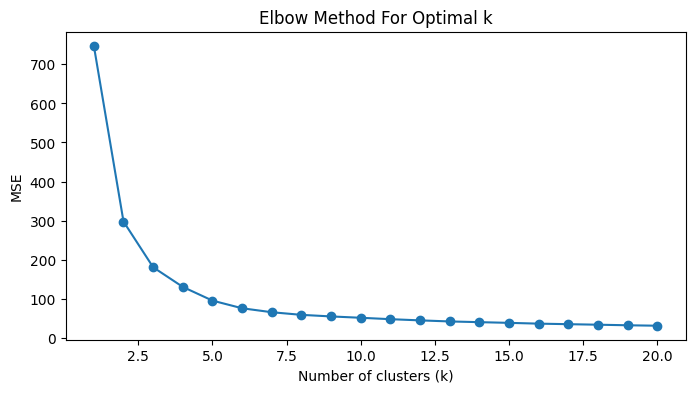

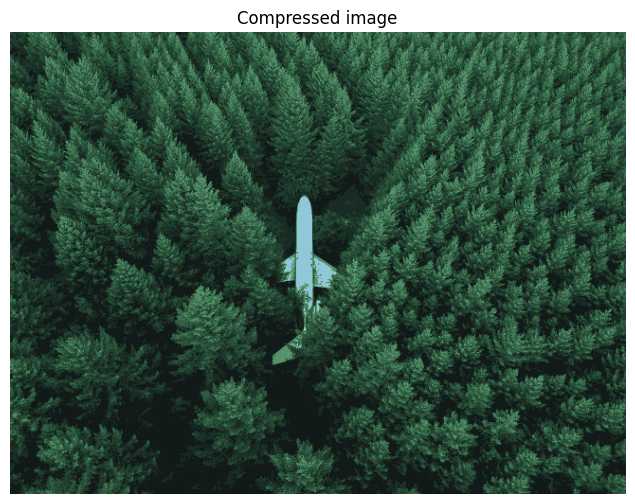

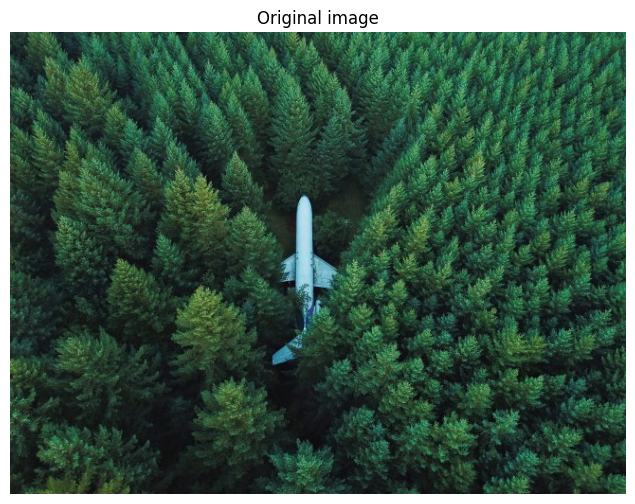

Original size:  (650, 488)
Compressed size:  488.64385618977474


In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


def calculate_mse_and_compress(n_clusters, data):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data)
    compressed_pixels = kmeans.cluster_centers_[kmeans.labels_]
    mse = mean_squared_error(data, compressed_pixels)
    return mse, compressed_pixels.astype(np.uint8)


image_path = "/content/drive/MyDrive/ML/forest.jpg"
image = Image.open(image_path)
pixels = np.array(image).reshape(-1, 3)


np.random.seed(0)
sample_size = int(pixels.shape[0] * 0.01)
sampled_pixels = pixels[np.random.choice(pixels.shape[0], sample_size, replace=False)]


k_values = range(1, 21)
mse_values = []
for k in k_values:
    mse, _ = calculate_mse_and_compress(k, sampled_pixels)
    mse_values.append(mse)

k_optimal = None
mse_drop_threshold = 0.1
for i in range(1, len(mse_values)):
    drop = (mse_values[i-1] - mse_values[i]) / mse_values[i-1]
    if drop < mse_drop_threshold:
        k_optimal = i
        break

if k_optimal is None:
    k_optimal = 2


_, compressed_pixels = calculate_mse_and_compress(k_optimal, pixels)


compressed_image = Image.fromarray(compressed_pixels.reshape(image.size[1], image.size[0], 3))
compressed_image.show()

# نمایش نمودار MSE
plt.figure(figsize=(8, 4))
plt.plot(k_values, mse_values, 'o-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('MSE')
plt.show()



# نمایش تصویر فشرده‌سازی شده
plt.figure(figsize=(8, 6))
plt.title('Compressed image')
plt.imshow(compressed_image)
plt.axis('off')  # برای حذف محورها
plt.show()

# نمایش تصویر اصلی
plt.figure(figsize=(8, 6))
plt.title('Original image')
plt.imshow(image)
plt.axis('off')  # برای حذف محورها
plt.show()

# چاپ اندازه تصویر اصلی و فشرده‌سازی شده
print("Original size: ", image.size)
print("Compressed size: ", k * 3 * 8 +  len(image.size) * np.log2(k))

# ذخیره تصویر فشرده‌سازی شده
compressed_image_path = '/content/drive/MyDrive/ML/compressed.jpg'  # مسیر دلخواه برای ذخیره تصویر فشرده

